In [21]:
import os
import pandas as pd
import numpy as np
import scipy.stats as st
import networkx as nx
from itertools import groupby
from collections import defaultdict
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [12]:
def generate_possible_routes_with_loops(steps):
    """
    Generate possible routes for a 3x3 maze with the bottom-left node removed, including loops, using networkx.
    Only valid routes adhering to adjacency rules will be generated.
    """
    # Create the maze graph
    maze = nx.Graph()  # Undirected graph since movement can happen in both directions

    # Define the nodes (2 to 9) and edges (adjacent connections in the maze)
    nodes = [2, 3, 4, 5, 6, 7, 8, 9]
    edges = [
        (2, 3), (2, 5),
        (3, 6),
        (4, 5), (4, 7),
        (5, 6), (5, 8),
        (6, 9),
        (7, 8),
        (8, 9)
    ]
    maze.add_nodes_from(nodes)
    maze.add_edges_from(edges)

    # Function to find all paths of exactly `steps` transitions
    def find_paths_with_loops(start_node, steps):
        all_paths = []
        stack = [(start_node, [start_node], 0)]  # (current_node, path_so_far, depth)

        while stack:
            current_node, path, depth = stack.pop()

            if depth == steps:  # Stop if the required step count is reached
                all_paths.append(path)
                continue

            for neighbor in maze.neighbors(current_node):
                if depth < steps:
                    stack.append((neighbor, path + [neighbor], depth + 1))
        
        return all_paths

    # Dictionary to store routes
    possible_routes = {node: defaultdict(list) for node in nodes}

    # Generate routes for each node
    for start_node in nodes:
        for step in range(1, steps + 1):
            # Generate all paths of the current step count
            possible_routes[start_node][step] = find_paths_with_loops(start_node, step)

    return possible_routes

def print_possible_routes(possible_routes):
    """
    Print the possible routes for debugging and inspection.
    """
    print("Possible Routes:")
    for node, routes in possible_routes.items():
        print(f"Node {node}:")
        for step in sorted(routes.keys()):
            print(f"  {step}-step routes: {routes[step]}")

# Generate and print possible routes
steps = 4
possible_routes = generate_possible_routes_with_loops(steps)
print_possible_routes(possible_routes)

Possible Routes:
Node 2:
  1-step routes: [[2, 5], [2, 3]]
  2-step routes: [[2, 5, 8], [2, 5, 6], [2, 5, 4], [2, 5, 2], [2, 3, 6], [2, 3, 2]]
  3-step routes: [[2, 5, 8, 9], [2, 5, 8, 7], [2, 5, 8, 5], [2, 5, 6, 9], [2, 5, 6, 5], [2, 5, 6, 3], [2, 5, 4, 7], [2, 5, 4, 5], [2, 5, 2, 5], [2, 5, 2, 3], [2, 3, 6, 9], [2, 3, 6, 5], [2, 3, 6, 3], [2, 3, 2, 5], [2, 3, 2, 3]]
  4-step routes: [[2, 5, 8, 9, 8], [2, 5, 8, 9, 6], [2, 5, 8, 7, 8], [2, 5, 8, 7, 4], [2, 5, 8, 5, 8], [2, 5, 8, 5, 6], [2, 5, 8, 5, 4], [2, 5, 8, 5, 2], [2, 5, 6, 9, 8], [2, 5, 6, 9, 6], [2, 5, 6, 5, 8], [2, 5, 6, 5, 6], [2, 5, 6, 5, 4], [2, 5, 6, 5, 2], [2, 5, 6, 3, 6], [2, 5, 6, 3, 2], [2, 5, 4, 7, 8], [2, 5, 4, 7, 4], [2, 5, 4, 5, 8], [2, 5, 4, 5, 6], [2, 5, 4, 5, 4], [2, 5, 4, 5, 2], [2, 5, 2, 5, 8], [2, 5, 2, 5, 6], [2, 5, 2, 5, 4], [2, 5, 2, 5, 2], [2, 5, 2, 3, 6], [2, 5, 2, 3, 2], [2, 3, 6, 9, 8], [2, 3, 6, 9, 6], [2, 3, 6, 5, 8], [2, 3, 6, 5, 6], [2, 3, 6, 5, 4], [2, 3, 6, 5, 2], [2, 3, 6, 3, 6], [2, 3, 6, 3, 2],

In [14]:
def process_majority_column(file_path):
    """
    Process the 'majority' column in the CSV file to:
    1. Remove all values > 10.
    2. Remove consecutive duplicates/repeats in the data.
    """
    # Load the CSV file
    df = pd.read_csv(file_path)

    # Convert 'majority' column to integers
    df["majority"] = df["majority"].astype(int)

    # Step 1: Remove all values > 10
    df = df[df["majority"] < 10]

    # Step 2: Remove consecutive duplicates
    df = df[df["majority"].shift() != df["majority"]]

    return df["majority"].tolist()

def process_all_csv_files(input_folder):
    """
    Process all CSV files in the input folder and return processed data for inspection.
    """
    processed_data = {}

    # Iterate through all CSV files in the folder
    files = [f for f in os.listdir(input_folder) if f.endswith(".csv")]
    for file in files:
        file_path = os.path.join(input_folder, file)
        print(f"Processing {file}...")

        try:
            # Process the 'majority' column
            processed_routes = process_majority_column(file_path)
            processed_data[file] = processed_routes

            # Print the processed data for inspection
            print(f"Processed data for {file}:")
            print(processed_routes[:50])  # Print only the first 50 rows for brevity
            print("\n---\n")
        except Exception as e:
            print(f"Error processing {file}: {e}")

    return processed_data

# Define input folder path
input_folder = "/Users/chenyaqing/Desktop/MSc Neuroscience/Research Project Hilary/Prepare_Analysis/tracking_node_cleaned"

# Process all files and inspect data
processed_data = process_all_csv_files(input_folder)

Processing c1m1_2025-02-06-135726.csv...
Processed data for c1m1_2025-02-06-135726.csv:
[8, 7, 4, 5, 6, 3, 2, 3, 2, 5, 8, 7, 8, 9, 8, 9, 8, 9, 8, 7, 8, 9, 6, 3, 2, 5, 8, 9, 8, 5, 6, 5, 6, 3, 6, 3, 2, 5, 6, 5, 8, 9, 8, 9, 8, 9, 8, 5, 2, 3]

---

Processing c3m5_2025-02-06-181311.csv...
Processed data for c3m5_2025-02-06-181311.csv:
[9, 6, 9, 6, 9, 6, 9, 6, 3, 6, 9, 8, 5, 8, 9, 6, 9, 6, 9, 6, 9, 8, 7, 8, 9, 8, 9, 6, 9, 6, 3, 2, 5, 6, 3, 6, 5, 2, 5, 4, 7, 8, 7, 8, 9, 8, 7, 8, 9, 8]

---

Processing c1m3_2025-02-06-150322.csv...
Processed data for c1m3_2025-02-06-150322.csv:
[5, 4, 7, 8, 9, 6, 9, 8, 5, 2, 5, 2, 5, 8, 9, 8, 7, 8, 7, 8, 9, 8, 9, 8, 9, 8, 5, 6, 5, 2, 5, 2, 3, 6, 3, 2, 3, 2, 5, 6, 5, 8, 9, 8, 9, 6, 3, 2, 5, 6]

---

Processing c3m3_2025-02-06-174920.csv...
Processed data for c3m3_2025-02-06-174920.csv:
[3, 6, 3, 2, 5, 8, 9, 6, 9, 6, 3, 2, 5, 8, 9, 8, 9, 8, 7, 8, 9, 6, 3, 6, 3, 2, 3, 6, 9, 6, 5, 8, 5, 4, 7, 8, 9, 6, 3, 2, 5, 8, 7, 8, 9, 6, 9, 6, 9, 6]

---

Processing c2m1_2025

In [15]:
from scipy.stats import entropy as st_entropy

In [25]:
def calculate_entropy(processed_data, possible_routes, steps=4):
    """
    Calculate the entropy for each file based on processed data and possible routes.
    """
    results = []

    for file, routes in processed_data.items():
        print(f"\nCalculating entropy for {file}...")

        # Initialize dictionaries to hold counts and entropies for each step
        entropy_results = {step: [] for step in range(1, steps + 1)}
        counts_by_step = {step: {} for step in range(1, steps + 1)}

        for step in range(1, steps + 1):
            # Initialize route counts for this step
            route_counts = {tuple(route): 0 for node in possible_routes for route in possible_routes[node][step]}

            # Slide through the mouse's actual routes and match with possible routes
            for i in range(len(routes) - step):
                route = tuple(routes[i:i + step + 1])  # Extract a route of length `step + 1`
                if route in route_counts:
                    route_counts[route] += 1  # Increment count if the route matches a possible route

            # Store counts for debugging
            counts_by_step[step] = {k: v for k, v in route_counts.items() if v > 0}  # Only keep non-zero counts

            # Calculate proportions
            total_counts = sum(route_counts.values())
            proportions = [count / total_counts for count in route_counts.values()] if total_counts > 0 else []

            # Set the base to the number of possible routes for normalization
            num_possible_routes = len(route_counts)
            step_entropy = st.entropy(proportions, base=num_possible_routes) if total_counts > 0 else 0
            entropy_results[step].append(step_entropy)

            # Debug print counts and proportions
            print(f"\n{step}-step routes (counts and proportions):")
            for route, count in route_counts.items():
                proportion = count / total_counts if total_counts > 0 else 0
                print(f"  Route: {route}, Count: {count}, Proportion: {proportion:.4f}")

        # Calculate average entropy for each step
        avg_entropies = {
            step: np.mean(entropy_results[step]) if entropy_results[step] else 0
            for step in range(1, steps + 1)
        }

        # Calculate overall average entropy
        overall_entropy = np.mean(list(avg_entropies.values())) if avg_entropies else 0

        # Print final results for the file
        print("\nEntropy Results:")
        for step in range(1, steps + 1):
            print(f"  Step {step}: Average Entropy = {avg_entropies[step]:.4f}")
        print(f"  Overall Average Entropy = {overall_entropy:.4f}")

        # Append results for this file
        results.append({
            "Mouse": file,
            **avg_entropies,
            "Overall": overall_entropy
        })

    # Convert results to a DataFrame
    results_df = pd.DataFrame(results)

    # Sort the DataFrame by overall entropy in descending order
    results_df = results_df.sort_values(by="Overall", ascending=False)

    print("\nFinal Results (Sorted by Overall Entropy):")
    print(results_df)

    return results_df

# Calculate entropy for processed data
entropy_results = calculate_entropy(processed_data, possible_routes, steps=4)


Calculating entropy for c1m1_2025-02-06-135726.csv...

1-step routes (counts and proportions):
  Route: (2, 5), Count: 5, Proportion: 0.0373
  Route: (2, 3), Count: 4, Proportion: 0.0299
  Route: (3, 6), Count: 4, Proportion: 0.0299
  Route: (3, 2), Count: 6, Proportion: 0.0448
  Route: (4, 7), Count: 0, Proportion: 0.0000
  Route: (4, 5), Count: 3, Proportion: 0.0224
  Route: (5, 8), Count: 5, Proportion: 0.0373
  Route: (5, 6), Count: 7, Proportion: 0.0522
  Route: (5, 4), Count: 0, Proportion: 0.0000
  Route: (5, 2), Count: 3, Proportion: 0.0224
  Route: (6, 9), Count: 6, Proportion: 0.0448
  Route: (6, 5), Count: 4, Proportion: 0.0299
  Route: (6, 3), Count: 6, Proportion: 0.0448
  Route: (7, 8), Count: 18, Proportion: 0.1343
  Route: (7, 4), Count: 3, Proportion: 0.0224
  Route: (8, 9), Count: 15, Proportion: 0.1119
  Route: (8, 7), Count: 21, Proportion: 0.1567
  Route: (8, 5), Count: 3, Proportion: 0.0224
  Route: (9, 8), Count: 15, Proportion: 0.1119
  Route: (9, 6), Count: 6,

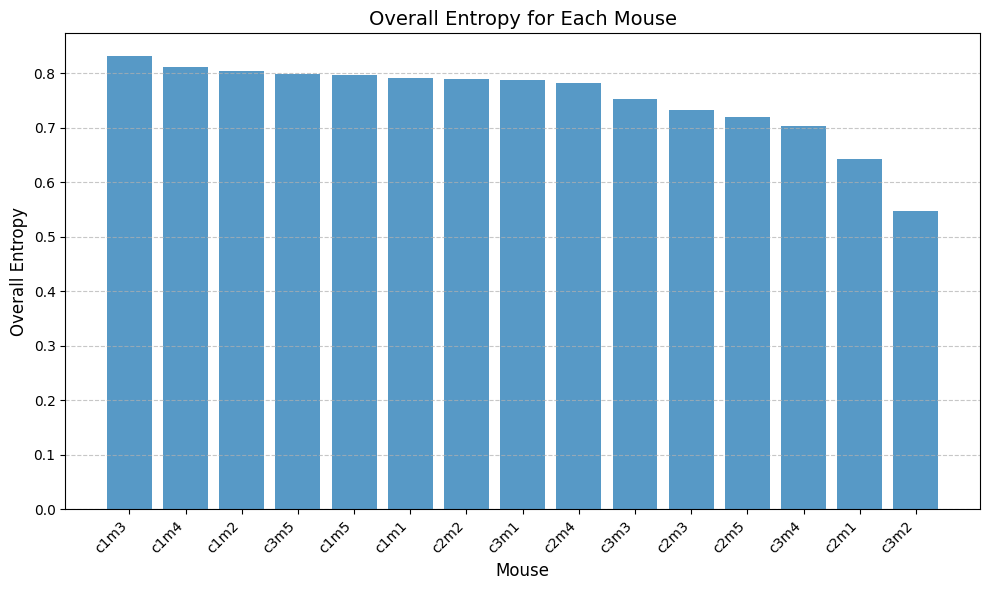

In [26]:
# Extract short names for each mouse
entropy_results_sorted = entropy_results.sort_values(by="Overall", ascending=False)
entropy_results_sorted["Short Name"] = entropy_results_sorted["Mouse"].str.split("_").str[0]

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(entropy_results_sorted["Short Name"], entropy_results_sorted["Overall"], alpha=0.75)
plt.xlabel("Mouse", fontsize=12)
plt.ylabel("Overall Entropy", fontsize=12)
plt.title("Overall Entropy for Each Mouse", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.tight_layout()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()